In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
from datetime import datetime

In [154]:
# Data File
hotel_data_path = "data/hotel_bookings_v2.csv"

# Read Data File and store into Pandas DataFrames
hotel_data = pd.read_csv(hotel_data_path,encoding="utf-8")

hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [155]:
#Print how many countries are in the dataset

hotel_data_df=pd.DataFrame(hotel_data)
country_list=hotel_data["country"].unique()

print(len(country_list))
print(country_list)

177
['Portugal' 'United Kingdom of Great Britain and Northern Ireland (the)'
 'United States of America' 'Spain' 'Ireland' 'France' nan 'Romania'
 'Norway' 'Oman' 'Argentina' 'Poland' 'Germany' 'Belgium' 'Switzerland'
 'China' 'Greece' 'Italy' 'Netherlands' 'Denmark' 'Russian Federation'
 'Sweden' 'Australia' 'Estonia' 'Czechia' 'Brazil' 'Finland' 'Mozambique'
 'Botswana' 'Luxembourg' 'Slovenia' 'Albania' 'India' 'Mexico' 'Morocco'
 'Ukraine' 'San Marino' 'Latvia' 'Puerto Rico' 'Serbia' 'Chile' 'Austria'
 'Belarus' 'Lithuania' 'Türkiye' 'South Africa' 'Angola' 'Israel'
 'Cayman Islands' 'Zambia' 'Cabo Verde' 'Zimbabwe' 'Algeria' 'Korea '
 'Costa Rica' 'Hungary' 'United Arab Emirates' 'Tunisia' 'Jamaica'
 'Croatia' 'Hong Kong' 'Iran' 'Georgia' 'Andorra' 'Gibraltar' 'Uruguay'
 'Jersey' 'Central African Republic' 'Cyprus' 'Colombia' 'Guernsey'
 'Kuwait' 'Nigeria' 'Maldives' 'Venezuela' 'Slovakia' 'Fiji' 'Kazakhstan'
 'Pakistan' 'Indonesia' 'Lebanon' 'Philippines ' 'Senegal' 'Seychelles'
 

In [156]:
#Calculate the average days in waiting list per country

hotel_data_df=pd.DataFrame(hotel_data)
countries_df=pd.DataFrame(hotel_data_df.groupby("country")["days_in_waiting_list"].mean())
DaysWaitingList=countries_df.loc[(countries_df["days_in_waiting_list"])>0.0]
DaysWaitingList


,days_in_waiting_list
country,
Algeria,0.145631
Argentina,0.280374
Armenia,1.875000
Austria,6.479810
Belarus,2.423077
Belgium,0.105892
Brazil,0.230216
Bulgaria,0.840000
Chile,0.230769


In [163]:
#Calculate the length of stay for each row.

hotel_type_Stay_df=pd.DataFrame(hotel_data_df.groupby("hotel")["days_in_waiting_list"].mean())

# 1. Convert the month into a number 
hotel_data["MonthNumber"]=pd.to_datetime(hotel_data["arrival_date_month"],format='%B').dt.month

# 2. Create a column for arrival date mm/dd/yyy
hotel_data["date_of_arrival"]=hotel_data[['MonthNumber', 'arrival_date_day_of_month', 'arrival_date_year']].astype(str).agg('/'.join, axis=1)

# 3. Calculate the lenght of stay 
hotel_data.loc[:,"length_of_stay"]= pd.to_datetime(hotel_data["reservation_status_date"], format='%m/%d/%Y')-pd.to_datetime(hotel_data["date_of_arrival"], format='%m/%d/%Y')

# 4. Filter by rooms that have Checkout status
hotel_df_checkouts=hotel_data[(hotel_data["reservation_status"]=="Check-Out")]

# 5. Arrange data frame 
hotel_df_checkouts=hotel_df_checkouts[["hotel","date_of_arrival","reservation_status_date","length_of_stay"]]
hotel_df_checkouts

,hotel,date_of_arrival,reservation_status_date,length_of_stay
0,Resort Hotel,7/1/2015,7/1/2015,0 days
1,Resort Hotel,7/1/2015,7/1/2015,0 days
2,Resort Hotel,7/1/2015,7/2/2015,1 days
3,Resort Hotel,7/1/2015,7/2/2015,1 days
4,Resort Hotel,7/1/2015,7/3/2015,2 days
...,...,...,...,...
119385,City Hotel,8/30/2017,9/6/2017,7 days
119386,City Hotel,8/31/2017,9/7/2017,7 days
119387,City Hotel,8/31/2017,9/7/2017,7 days
119388,City Hotel,8/31/2017,9/7/2017,7 days


In [192]:
hotel_df_checkouts.loc[:, "length_of_stay_number"] = hotel_df_checkouts["length_of_stay"].dt.days.astype(int)
hotel_df_checkouts_2=pd.DataFrame(hotel_df_checkouts.groupby("hotel")["length_of_stay_number"].mean())
hotel_df_checkouts_2

,length_of_stay_number
hotel,
City Hotel,2.923250
Resort Hotel,4.136602


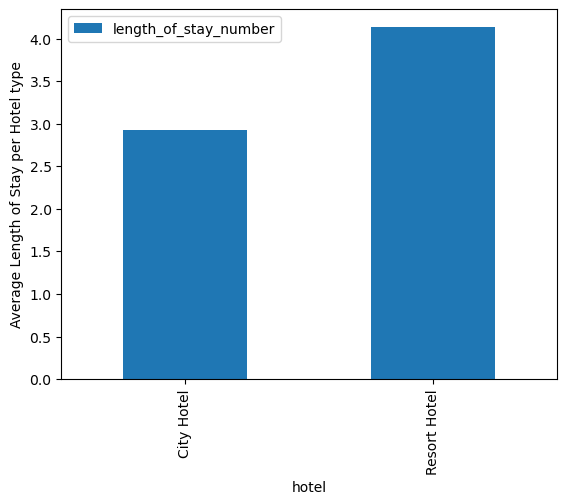

In [194]:
hotel_df_checkouts_2.plot.bar(y="length_of_stay_number")
plt.ylabel('Average Length of Stay per Hotel type')

plt.show()

In [178]:
months_demand=pd.DataFrame(hotel_data.groupby("arrival_date_month")["hotel"].count())

months_demand

,hotel
arrival_date_month,
April,11089
August,13877
December,6780
February,8068
January,5929
July,12661
June,10939
March,9794
May,11791


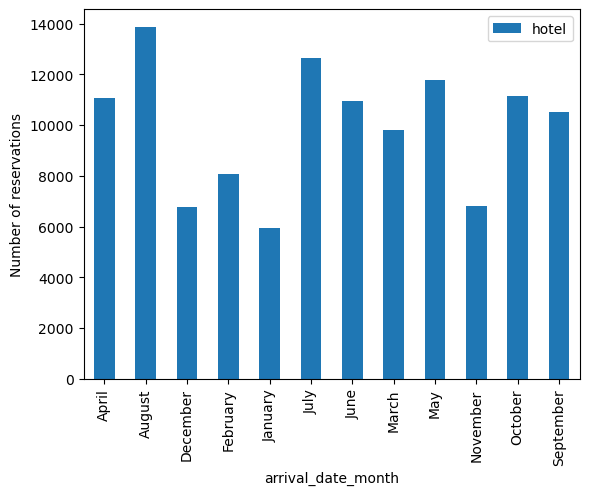

In [185]:
months_demand.plot.bar(y="hotel")
plt.ylabel('Number of reservations')

plt.show()



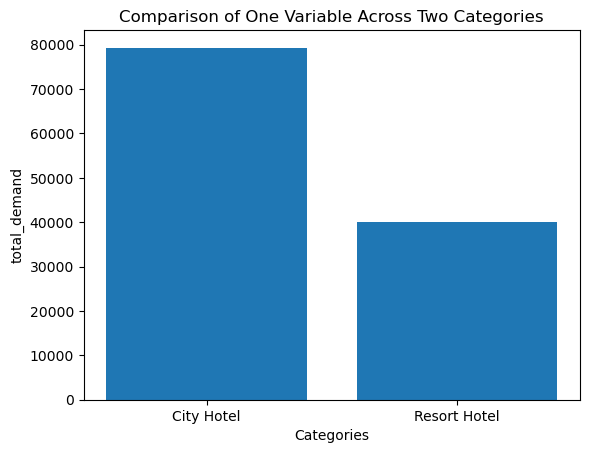

In [198]:
total_demand = hotel_data.groupby('hotel').count()  
categories = total_demand.index.tolist()  # This will give you the hotel categories
values = total_demand['arrival_date_month'].tolist()  # Replace 'demand' with the actual column name

plt.bar(categories,values)

plt.title('Comparison of One Variable Across Two Categories')
plt.xlabel('Categories')
plt.ylabel("total_demand")

plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_1004\2535423544.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values_city = [monthly_demand_city.get(month, 0) for month in months]
C:\Users\danie\AppData\Local\Temp\ipykernel_1004\2535423544.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values_resort = [monthly_demand_resort.get(month, 0) for month in months]


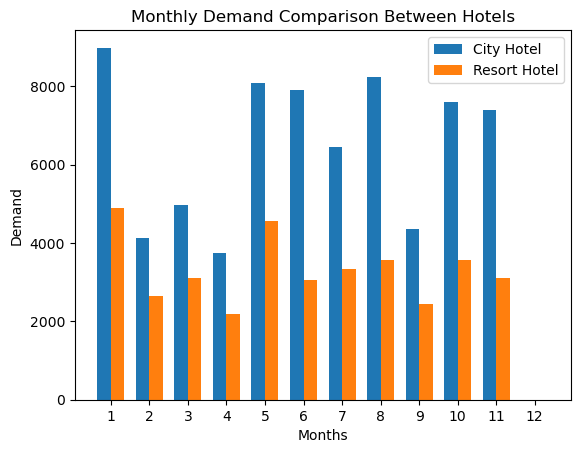

In [201]:

months = range(1, 13)  # Assuming you have 12 months
monthly_demand_city = hotel_data[hotel_data['hotel'] == 'City Hotel'].groupby('arrival_date_month').size()
monthly_demand_resort = hotel_data[hotel_data['hotel'] == 'Resort Hotel'].groupby('arrival_date_month').size()


values_city = [monthly_demand_city.get(month, 0) for month in months]
values_resort = [monthly_demand_resort.get(month, 0) for month in months]

x = np.arange(len(months))  
width = 0.35  

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, values_city, width, label='City Hotel')
bars2 = ax.bar(x + width/2, values_resort, width, label='Resort Hotel')

ax.set_xlabel('Months')
ax.set_ylabel('Demand')
ax.set_title('Monthly Demand Comparison Between Hotels')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

plt.show()

In [187]:

hotel_data_df=pd.DataFrame(hotel_data)

countries_df_hotel_type=pd.DataFrame(hotel_data.groupby("hotel")["days_in_waiting_list"].mean())

DaysWaitingListHotelType=countries_df.loc[(countries_df["days_in_waiting_list"])>0.0]

DaysWaitingListHotelType


,days_in_waiting_list
country,
Algeria,0.145631
Argentina,0.280374
Armenia,1.875000
Austria,6.479810
Belarus,2.423077
Belgium,0.105892
Brazil,0.230216
Bulgaria,0.840000
Chile,0.230769


In [190]:
k=pd.DataFrame(hotel_data.groupby("hotel")["hotel"].count())
k

,hotel
hotel,
City Hotel,79330
Resort Hotel,40060


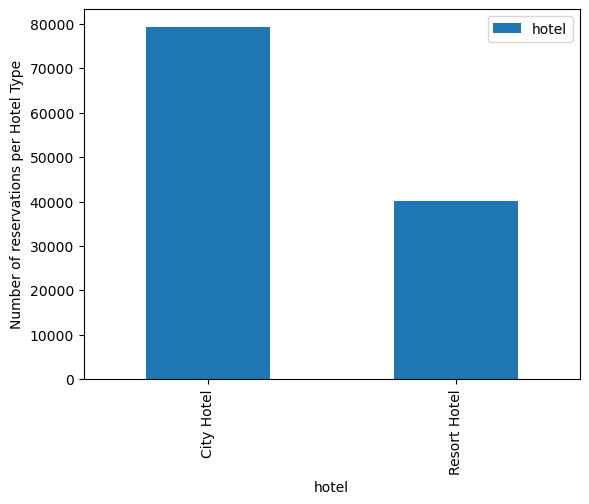

In [191]:
k.plot.bar(y="hotel")
plt.ylabel('Number of reservations per Hotel Type')

plt.show()

In [ ]:
# Export the Data into a csv
## hotel_data_df.to_csv("output_data/hotel_data.csv", index_label="")

In [ ]:
# Save the figure
## plt.savefig("output_data/Fig1.png")